In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# Function to simulate data
def simulate_data(mean, std, n):
    return np.random.normal(mean, std, n)

# Function to perform t-test and determine error type
def perform_test(control, experimental, alpha=0.05):
    stat, p_value = ttest_ind(control, experimental)
    reject_null = p_value < alpha
    return reject_null, p_value

In [3]:
# Parameters
np.random.seed(0)
n = 100
control_mean = 100
experimental_mean = 100
std = 10
alpha = 0.05

# Simulate data for Type I Error (null hypothesis is true)
control = simulate_data(control_mean, std, n)
experimental = simulate_data(control_mean, std, n) # Same mean as control
reject_null, p_value = perform_test(control, experimental, alpha)

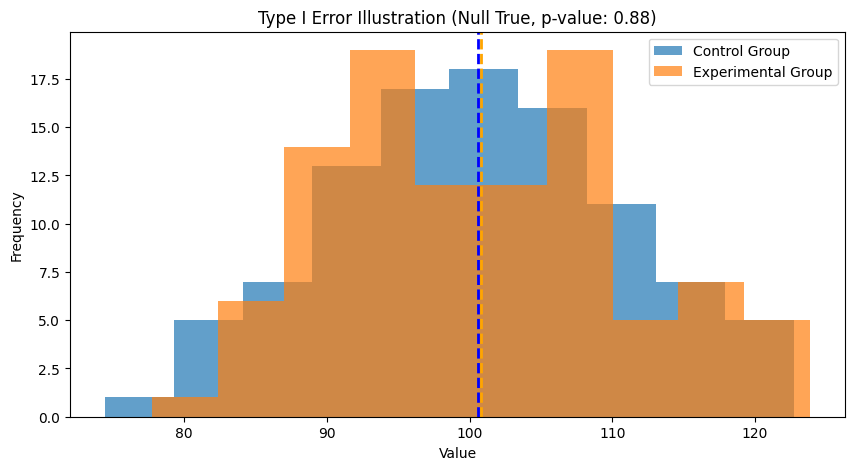

In [4]:
# Plot for Type I Error
plt.figure(figsize=(10, 5))
plt.hist(control, alpha=0.7, label='Control Group')
plt.hist(experimental, alpha=0.7, label='Experimental Group')
plt.axvline(np.mean(control), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(experimental), color='orange', linestyle='dashed', linewidth=2)
plt.title(f"Type I Error Illustration (Null True, p-value: {p_value:.2f})")
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [5]:
# For Type II Error, shift the mean of the experimental group
experimental_mean_shifted = 110
experimental_shifted = simulate_data(experimental_mean_shifted, std, n)
reject_null_shifted, p_value_shifted = perform_test(control, experimental_shifted, alpha)

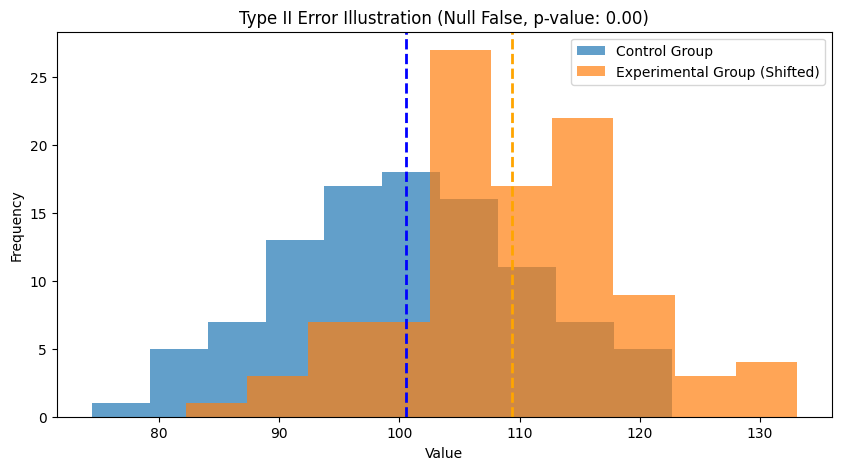

In [6]:
# Plot for Type II Error
plt.figure(figsize=(10, 5))
plt.hist(control, alpha=0.7, label='Control Group')
plt.hist(experimental_shifted, alpha=0.7, label='Experimental Group (Shifted)')
plt.axvline(np.mean(control), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(experimental_shifted), color='orange', linestyle='dashed', linewidth=2)
plt.title(f"Type II Error Illustration (Null False, p-value: {p_value_shifted:.2f})")
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()